In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

TREATED_DATASET = '../dataset/fake_job_word2vec.csv'

In [10]:
import pickle

# Carregar o DataFrame com pickle
with open('../dataset/fake_job_word2vec.pkl', 'rb') as f:
    data = pickle.load(f)

In [11]:
data.head()

,telecommuting,has_company_logo,has_questions,fraudulent,salary_min,salary_max,employment_type_-,employment_type_Contract,employment_type_Full-time,employment_type_Other,...,required_education_Vocational - HS Diploma,title_vector,location_vector,department_vector,company_profile_vector,description_vector,requirements_vector,benefits_vector,industry_vector,function_vector
0,0,1,0,0,0,0,0,0,0,1,...,0,"[-0.84525394, -0.18185475, 0.6994233, 1.819068...","[0.09093219, 1.1964487, -2.2067819, 0.9726109,...","[-0.82723045, -1.0614119, 2.1088731, 3.5304492...","[-0.711043, 0.2946177, -0.29541782, 0.18943201...","[-0.6586604, 0.7360017, -0.26968998, 0.6841621...","[-0.21637158, 0.67470396, 0.08782808, 0.196237...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.82723045, -1.0614119, 2.1088731, 3.5304492..."
1,0,1,0,0,0,0,0,0,1,0,...,0,"[0.6677264, 1.1746644, 0.7818688, 0.021744847,...","[-0.11701747, 0.98648447, -0.70229155, 0.22006...","[-3.57316, 1.0816542, 0.40557733, 1.2263387, -...","[-0.5568471, 0.46270373, 0.46705392, -0.130891...","[-0.3889452, 0.6246517, 0.1548443, 0.22980177,...","[-0.19320303, 0.75636166, 0.26312044, 0.356866...","[-0.2636343, 0.659767, 0.11539761, 0.2148898, ...","[-1.7466006, -0.041971684, 1.1013478, 2.607851...","[0.30603668, 1.1551279, 0.23127906, 1.0180255,..."
2,0,1,0,0,0,0,1,0,0,0,...,0,"[-0.83985394, 0.13102812, -0.5154955, 0.820037...","[0.55869263, 0.37951723, -0.50967145, 0.108177...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.1110485, -0.03975634, -0.5365781, 0.190385...","[-0.38722867, -0.7216357, -0.059794698, 0.6568...","[-0.71245915, 0.62866694, -0.0006886383, 0.402...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0,1,0,0,0,0,0,0,1,0,...,0,"[-0.6763156, 0.74618936, -1.655303, 2.0162556,...","[0.72864026, 0.99891824, -1.4054223, 1.05736, ...","[1.8737859, -0.5436919, -1.6310282, 3.146639, ...","[-0.19833423, -0.33683726, 0.46237862, -0.4979...","[-0.30805734, 0.44491237, 0.20117281, 0.381490...","[0.20679735, 0.38584527, 0.1653388, 0.49131846...","[-0.018238794, -0.0035780254, 0.055408392, -0....","[3.1612725, 0.36362112, -0.77692676, 0.7009644...","[1.8737859, -0.5436919, -1.6310282, 3.146639, ..."
4,0,1,1,0,0,0,0,0,1,0,...,0,"[-1.8301481, 0.9306405, -0.6256303, -0.0895560...","[0.072459996, 0.07980336, -1.2065592, 0.398709...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.21203305, 0.22003247, -0.017210696, 0.7602...","[-0.5960806, 0.34076518, -0.10837317, 0.065871...","[0.32855195, 0.37795225, 0.26757485, 0.3718151...","[-2.0897202, -0.659609, 0.5348242, -0.18022855...","[-2.1138844, -0.15772685, -0.17443557, 2.09698...","[-1.4847593, 0.55348533, 0.45036742, 2.665693,..."


In [14]:
colums_to_drop = ['fraudulent']

X = data.drop(columns=colums_to_drop)
Y = data['fraudulent']

In [16]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, Y)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.25)

### Logistic Regression

In [20]:
logistic_regression = LogisticRegression(max_iter=1000) 
logistic_regression.fit(X_train, Y_train)

# Predict on the testing set
y_pred = logistic_regression.predict(X_test)

has_company_logo                        0.103100
salary_max                              0.054382
has_questions                           0.041609
required_experience_-                   0.017182
required_education_Bachelor's Degree    0.016274
required_education_-                    0.016044
required_experience_Mid-Senior level    0.008033
salary_min                              0.005782
function_vector                         0.005079
required_experience_Associate           0.004171
dtype: float64


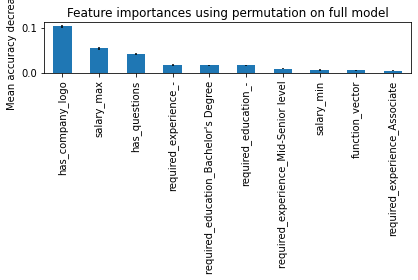

In [22]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(logistic_regression, X_test, Y_test,n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

forest_importances_sorted = forest_importances.sort_values(ascending=False)

# Selecionar as 10 features mais importantes
top_10_features = forest_importances_sorted.head(10)
print(top_10_features)
top_10_indices = [X_test.columns.get_loc(col) for col in top_10_features.index]
top_10_std = result.importances_std[top_10_indices]

# Plotar as 10 features mais importantes
fig, ax = plt.subplots()
top_10_features.plot.bar(yerr=top_10_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Confusion Matrix

Acurácia dos dados de teste:  0.6712119431056777



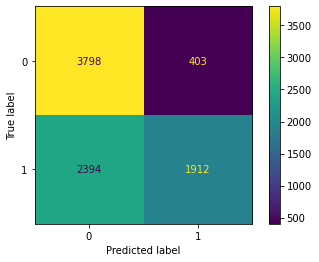

In [23]:
y_pred = logistic_regression.predict(X_test)

print("Acurácia dos dados de teste: ", accuracy_score(Y_test,y_pred))
print()

cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression.classes_)

disp.plot()

plt.show()

## Evaluation Metrics

Precision

In [24]:
precision_score_number = precision_score(Y_test, y_pred)

Recall

In [25]:
recall_score_number = recall_score(Y_test, y_pred)

F1-Score

In [26]:
f1_score_number = f1_score(Y_test, y_pred)

Func for printing all the evaluate metrics

In [27]:
def get_evaluate_metrics():
    print(f'''
        Precision Score of the fake class is: {precision_score_number}
        Recall Score of the fake class is: {recall_score_number}
        F1 Score of the fake class is: {f1_score_number}
    ''')

In [28]:
get_evaluate_metrics()


        Precision Score of the fake class is: 0.8259179265658747
        Recall Score of the fake class is: 0.4440315838365072
        F1 Score of the fake class is: 0.5775562603836278
    


Precision-Recall Curve -> We are dealing with a imbalanced dataset, so the choice for using the Precision-Recall Curve is because it gives more importance to positive class. Thus is helpful for dealing with imbalanced data, which is our case for fake job postings. 

In [29]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)
average_precision = average_precision_score(Y_test, y_pred)

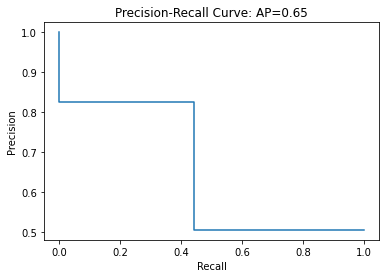

In [30]:
plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve: AP={average_precision:.2f}')
plt.show()

c:\Users\JoaoFelipeMoraisVasc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


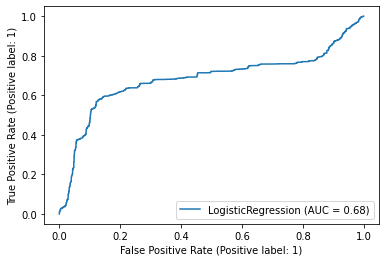

In [32]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
fpr, tpr, threshold = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

plot_roc_curve(logistic_regression, X_test, Y_test)

### Final Report of our Model

In [33]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.90      0.73      4201
           1       0.83      0.44      0.58      4306

    accuracy                           0.67      8507
   macro avg       0.72      0.67      0.65      8507
weighted avg       0.72      0.67      0.65      8507

